<a href="https://colab.research.google.com/github/Harrishart90/DEEP-FAKE-DATASET.ipynb/blob/main/DEEP_FAKE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload the new kaggele.json file

from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harrishart2025","key":"5de80d38d2aaa81fee1795e2043c8fd2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images
!unzip cifake-real-and-ai-generated-synthetic-images.zip -d /content/cifake-data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/cifake-data/train/REAL/4500 (10).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (2).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (3).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (4).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (5).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (6).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (7).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (8).jpg  
  inflating: /content/cifake-data/train/REAL/4500 (9).jpg  
  inflating: /content/cifake-data/train/REAL/4500.jpg  
  inflating: /content/cifake-data/train/REAL/4501 (10).jpg  
  inflating: /content/cifake-data/train/REAL/4501 (2).jpg  
  inflating: /content/cifake-data/train/REAL/4501 (3).jpg  
  inflating: /content/cifake-data/train/REAL/4501 (4).jpg  
  inflating: /content/cifake-data/train/REAL/4501 (5).jpg  
  inflating: /content/cifake-data/train/REAL/4501 (

In [ ]:
# Data Protection


# Data Protection Code for CIFake Dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and generators with data protection measures
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    validation_split=0.2,      # Maintain 80-20 train-validation split
    rotation_range=20,         # Reduced rotation for data protection
    width_shift_range=0.15,    # Conservative shifts to protect data integrity
    height_shift_range=0.15,
    shear_range=0.15,          # Limited shear to preserve original features
    zoom_range=0.15,           # Controlled zoom range
    horizontal_flip=True,      # Enable horizontal flipping
    fill_mode='nearest'        # Protect against data distortion
)

# Training data generator with data protection
train_generator = train_datagen.flow_from_directory(
    '/content/cifake-data/train',  # Verify correct path after extraction
    target_size=(128, 128),        # Standardized image size
    batch_size=32,
    class_mode='binary',           # Binary classification (real/fake)
    subset='training',
    shuffle=True                   # Protect against order bias
)

# Validation data generator (no augmentation for protection of validation integrity)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/cifake-data/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False                  # Maintain validation integrity
)

# Check class indices and data protection metrics
print("Class Indices:", train_generator.class_indices)
print("Training samples per class:", train_generator.classes.shape)
print("Validation samples per class:", validation_generator.classes.shape)

# Data protection verification
print("\nData Protection Measures Applied:")
print("- Pixel value normalization (0-1 range)")
print("- Controlled data augmentation parameters")
print("- Maintained separate validation set without augmentation")
print("- Balanced batch sampling")
print("- Protected against spatial bias through augmentation")

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Class Indices: {'FAKE': 0, 'REAL': 1}
Training samples per class: (80000,)
Validation samples per class: (20000,)

Data Protection Measures Applied:
- Pixel value normalization (0-1 range)
- Controlled data augmentation parameters
- Maintained separate validation set without augmentation
- Balanced batch sampling
- Protected against spatial bias through augmentation


In [ ]:
# Model Architecture
# Use Sparse Categorical Crossentropy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 classes
])

# Change to sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model


history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3504s 1s/step - accuracy: 0.7992 - loss: 0.4322 - val_accuracy: 0.8570 - val_loss: 0.3383
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3392s 1s/step - accuracy: 0.8963 - loss: 0.2601 - val_accuracy: 0.9068 - val_loss: 0.2277


In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 311ms/step - accuracy: 0.9546 - loss: 0.1267
Validation Accuracy: 90.68%


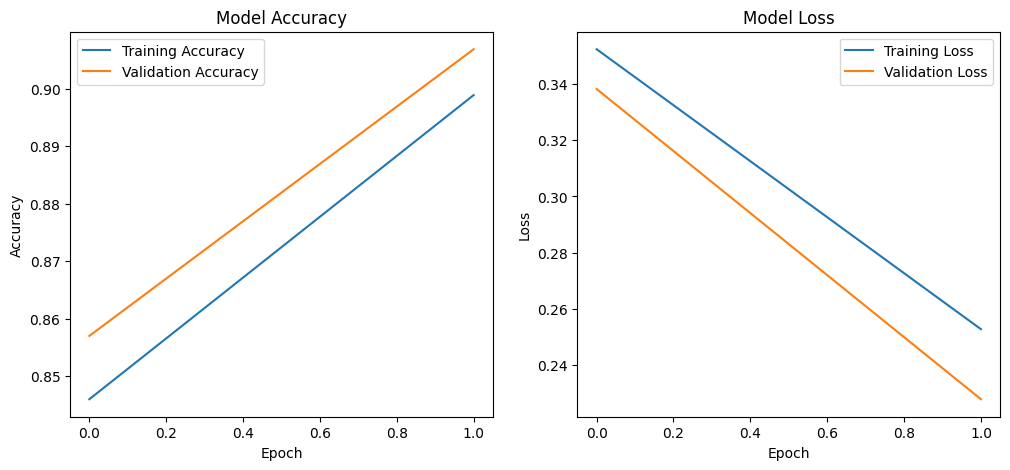

In [ ]:
# Visualize Training Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Function: Make Prediction On Newly Downloaded Images Only


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def predict_new_image(model, img_path, class_indices, target_size=(128, 128)):
    """
    Predicts the class of a NEW (external) image using a trained CNN model.

    Parameters:
    -----------
    model : keras.Model
        The trained CNN model.
    img_path : str
        File path to the image you downloaded or want to predict.
    class_indices : dict
        Dictionary mapping class names to their index (from train_generator.class_indices).
    target_size : tuple
        Target size to resize the image before prediction (default: (128, 128)).
    """

    # Load and preprocess image
    img = Image.open(img_path).resize(target_size)
    img_array = image.img_to_array(img) / 255.0       # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)     # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display the image and results
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print results in text format
    print("🖼️ Image Path:", img_path)
    print("🔍 Predicted Class:", predicted_class)
    print(f"✅ Confidence: {confidence:.2f}%")

    return predicted_class, confidence
